In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import datetime
data=pd.read_csv('2.OnlineRetail.csv',encoding = "ISO-8859-1")
data

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,12/9/2011 12:50,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,12/9/2011 12:50,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,12/9/2011 12:50,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,12/9/2011 12:50,4.15,12680.0,France


Biểu đồ đường thể hiện doanh thu theo từng tháng năm 2011.
Biểu đồ cột thể hiện số lượng đơn hàng trong các tháng của năm 2011.

In [7]:
data['InvoiceDate']=pd.to_datetime(data['InvoiceDate'])#Chuyển InvoiceDate thành datetime Object
data1=data[['InvoiceNo','Quantity','InvoiceDate','UnitPrice']]
data1['Revenue']=data1['Quantity']*data1['UnitPrice']
data1

C:\Users\Asus\AppData\Local\Temp\ipykernel_4504\282691678.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data1['Revenue']=data1['Quantity']*data1['UnitPrice']


,InvoiceNo,Quantity,InvoiceDate,UnitPrice,Revenue
0,536365,6,2010-12-01 08:26:00,2.55,15.30
1,536365,6,2010-12-01 08:26:00,3.39,20.34
2,536365,8,2010-12-01 08:26:00,2.75,22.00
3,536365,6,2010-12-01 08:26:00,3.39,20.34
4,536365,6,2010-12-01 08:26:00,3.39,20.34
...,...,...,...,...,...
541904,581587,12,2011-12-09 12:50:00,0.85,10.20
541905,581587,6,2011-12-09 12:50:00,2.10,12.60
541906,581587,4,2011-12-09 12:50:00,4.15,16.60
541907,581587,4,2011-12-09 12:50:00,4.15,16.60


In [8]:
#Chuyển mỗi giá trị của InvoiceDate thành Index 
data1=data1.set_index(['InvoiceDate'])

In [9]:
#Lọc những hàng có chưa '2011'
data2=data1['2011']
data2=data2.reset_index()
data2

C:\Users\Asus\AppData\Local\Temp\ipykernel_4504\2943012966.py:2: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
  data2=data1['2011']


,InvoiceDate,InvoiceNo,Quantity,UnitPrice,Revenue
0,2011-01-04 10:00:00,539993,10,1.95,19.50
1,2011-01-04 10:00:00,539993,25,0.42,10.50
2,2011-01-04 10:00:00,539993,25,0.42,10.50
3,2011-01-04 10:00:00,539993,5,2.10,10.50
4,2011-01-04 10:00:00,539993,10,1.25,12.50
...,...,...,...,...,...
499423,2011-12-09 12:50:00,581587,12,0.85,10.20
499424,2011-12-09 12:50:00,581587,6,2.10,12.60
499425,2011-12-09 12:50:00,581587,4,4.15,16.60
499426,2011-12-09 12:50:00,581587,4,4.15,16.60


In [12]:
#Tính tổng doanh thu theo tháng
data3=data2.groupby(by=data2['InvoiceDate'].dt.month).sum()
data3

,Quantity,UnitPrice,Revenue
InvoiceDate,,,
1,308966,172752.800,560000.260
2,277989,127448.770,498062.650
3,351872,171486.510,683267.080
4,289098,129164.961,493207.121
5,380391,190685.460,723333.510
6,341623,200717.340,691123.120
7,391116,171906.791,681300.111
8,406199,150385.680,682680.510
9,549817,199235.212,1019687.622


In [16]:
#Xóa bỏ các dòng trùng lặp của cùng một đơn hàng
data4=data1.drop_duplicates(subset='InvoiceNo',keep='first')
data4=data4['2011']
data4=data4.reset_index()
data5=data4.groupby(by=data4['InvoiceDate'].dt.month).count()
data5

C:\Users\Asus\AppData\Local\Temp\ipykernel_4504\1382313978.py:3: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
  data4=data4['2011']


,InvoiceDate,InvoiceNo,Quantity,UnitPrice,Revenue
InvoiceDate,,,,,
1,1476,1476,1476,1476,1476
2,1393,1393,1393,1393,1393
3,1983,1983,1983,1983,1983
4,1744,1744,1744,1744,1744
5,2162,2162,2162,2162,2162
6,2012,2012,2012,2012,2012
7,1927,1927,1927,1927,1927
8,1737,1737,1737,1737,1737
9,2327,2327,2327,2327,2327


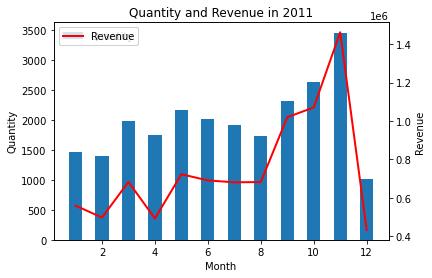

In [19]:
x=data5.index.get_level_values(0)
y1=data5['Quantity']
y2=data3['Revenue']
plt.bar(x,y1,width=0.5,label='Quantity')
axes1=plt.gca()
axes2=axes1.twinx()
axes2.plot(x,y2,label='Revenue',linewidth=2,c='r')
axes1.set_xlabel('Month')
axes1.set_ylabel('Quantity')
axes2.set_ylabel('Revenue')
axes1.legend()
axes2.legend()
plt.title('Quantity and Revenue in 2011')
plt.show()
